In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import unicodedata

df= pd.read_csv("text_emotion.csv")
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [3]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [4]:
print(df.duplicated())


0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool


In [5]:
print(df.duplicated().sum())

0


In [6]:
len(set(df.sentiment))

13

In [7]:
set(df.sentiment)

{'anger',
 'boredom',
 'empty',
 'enthusiasm',
 'fun',
 'happiness',
 'hate',
 'love',
 'neutral',
 'relief',
 'sadness',
 'surprise',
 'worry'}

In [8]:
def preprocess(tweet):
    
    tweet = re.sub(r"http\S+", " ", tweet)
    
    tweet = re.sub(r"@\S+", " ", tweet)
    
    tweet = re.sub(r"RT", " ", tweet)
    
    tweet = re.sub(r"\_", " ", tweet)
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    
    tweet=re.sub(r"\b[a-z]\b"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    
    return tweet

def clean_tweet(tweet):
    
    tweet=unicodedata.normalize('NFC', tweet).encode('ascii','replace')
    tweet=tweet.decode('utf8')
    tweet=preprocess(tweet)
    return tweet


In [9]:
df["content2"]=df["content"].apply(preprocess)

In [10]:
print(df[['content2']])

                                                content2
0       know was listenin to bad habit earlier and st...
1      layin bed with headache ughhhh waitin on your ...
2                        funeral ceremony gloomy friday 
3                   wants to hang out with friends soon 
4       we want to trade with someone who has houston...
...                                                  ...
39995                                                   
39996                      happy mothers day all my love
39997  happy mother day to all the mommies out there ...
39998   wassup beautiful follow me peep out my new hi...
39999   bullet train from tokyo the gf and have been ...

[40000 rows x 1 columns]


In [11]:
def replace(label):
    if label in ["anger","boredom","empty","hate","sadness","worry"]:
        return 0
    else:
        return 1
        
        

In [12]:
df["sentiment2"]=df["sentiment"].apply(replace)
print(df[['sentiment2']])

       sentiment2
0               0
1               0
2               0
3               1
4               1
...           ...
39995           1
39996           1
39997           1
39998           1
39999           1

[40000 rows x 1 columns]


In [13]:
df.drop(['tweet_id'], axis=1,inplace=True)
df.drop(['author'], axis=1,inplace=True)
df.drop(['content'], axis=1,inplace=True)
df.drop(['sentiment'], axis=1,inplace=True)

In [14]:
df.head()

,content2,sentiment2
0,know was listenin to bad habit earlier and st...,0
1,layin bed with headache ughhhh waitin on your ...,0
2,funeral ceremony gloomy friday,0
3,wants to hang out with friends soon,1
4,we want to trade with someone who has houston...,1


In [15]:
df['sentiment2'].value_counts()

1    23937
0    16063
Name: sentiment2, dtype: int64

<AxesSubplot:>

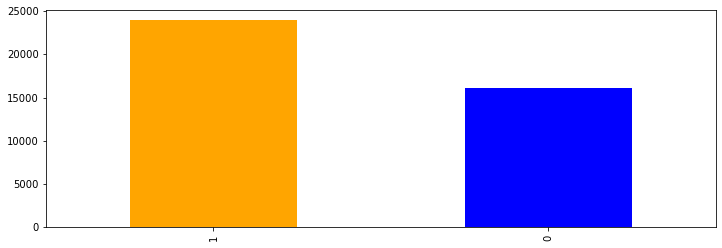

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
df['sentiment2'].value_counts().plot(kind='bar', color=["orange", "blue"])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(df["content2"]).toarray()
y=df["sentiment2"]

In [18]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print(y)

0        0
1        0
2        0
3        1
4        1
        ..
39995    1
39996    1
39997    1
39998    1
39999    1
Name: sentiment2, Length: 40000, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(text_train,sent_train)


LogisticRegression(random_state=0)

In [22]:
#s=classifier1.predict(text_train)
#round(classifier1.score(text_train,sent_train), 4)



In [23]:
#k fold cross validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(classifier1, text_train, sent_train, cv=10)

round(scores1.mean(), 4)


0.7134

In [24]:
sent_pred1 = classifier1.predict(text_test)


from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(sent_test, sent_pred1)

print(cm1)
#classifier score



[[1641 1569]
 [ 776 4014]]


In [25]:
round(classifier1.score(text_test,sent_test), 4)

0.7069

In [26]:
#import sklearn
#sklearn.metrics.accuracy_score(sent_test, sent_pred1)
#sklearn.metrics.precision_score(sent_test, sent_pred1)


In [27]:
print(classification_report(sent_test, sent_pred1))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58      3210
           1       0.72      0.84      0.77      4790

    accuracy                           0.71      8000
   macro avg       0.70      0.67      0.68      8000
weighted avg       0.70      0.71      0.70      8000



In [42]:

sample = ["Went to a bar - they said they don't allow stags! When will discrimination end in India?"]
sample = vectorizer.transform(sample).toarray()
sentiment = classifier2.predict(sample)
sentiment[0]



1

In [30]:
sent_pred1=pd.Series(sent_pred1)
sent_pred1

0       0
1       0
2       0
3       0
4       1
       ..
7995    1
7996    0
7997    1
7998    1
7999    1
Length: 8000, dtype: int64

In [31]:

from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(text_train,sent_train)
  


MultinomialNB()

In [32]:
#k fold cross validation
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(classifier2, text_train, sent_train, cv=10)

round(scores2.mean(), 4)


0.7083

In [33]:
sent_pred2 = classifier2.predict(text_test)


from sklearn.metrics import confusion_matrix, classification_report
cm2 = confusion_matrix(sent_test, sent_pred2)

print(cm2)

[[1472 1738]
 [ 631 4159]]


In [34]:
round(classifier2.score(text_test,sent_test), 4)

0.7039

In [35]:
print(classification_report(sent_test, sent_pred2))

              precision    recall  f1-score   support

           0       0.70      0.46      0.55      3210
           1       0.71      0.87      0.78      4790

    accuracy                           0.70      8000
   macro avg       0.70      0.66      0.67      8000
weighted avg       0.70      0.70      0.69      8000



In [36]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(text_train,sent_train)

GaussianNB()

In [37]:
#k fold cross validation
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(classifier3, text_train, sent_train, cv=10)

round(scores3.mean(), 4)


0.6352

In [38]:
sent_pred3 = classifier3.predict(text_test)


from sklearn.metrics import confusion_matrix, classification_report
cm3= confusion_matrix(sent_test, sent_pred3)

cm3

array([[2085, 1125],
       [1710, 3080]], dtype=int64)

In [39]:
round(classifier3.score(text_test,sent_test), 4)

0.6456

In [40]:
print(classification_report(sent_test, sent_pred3))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60      3210
           1       0.73      0.64      0.68      4790

    accuracy                           0.65      8000
   macro avg       0.64      0.65      0.64      8000
weighted avg       0.66      0.65      0.65      8000



In [41]:
import pickle
 
with open('multi.pkl', 'wb') as f:
    pickle.dump(classifier2, f)

In [41]:
with open('logis.pkl', 'wb') as f:
    pickle.dump(classifier1, f)

In [42]:
with open('gauss.pkl', 'wb') as f:
    pickle.dump(classifier3, f)

In [43]:
# Saving the Tf-Idf model
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)